<a href="https://colab.research.google.com/github/Thanatipz/BSC_DPDM23/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
shopping_data = pd.read_csv('/content/drive/MyDrive/DSC_DPDM/customer_shopping_data.csv')
shopping_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


###เราจะลบ Price ของ Record ที่เป็นClothing,Cash,Metrocity ออก เพื่อจำลอง Missing Data

###ทำให้ Price Missing

In [5]:
import numpy as np


In [6]:
willbemissing = shopping_data[(shopping_data['category']=='Clothing')&
 (shopping_data['payment_method']=='Cash')&
 (shopping_data['shopping_mall']=='Metrocity')]

In [7]:
willbemissing['price']= np.nan

<ipython-input-7-0b0dba1fb0da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  willbemissing['price']= np.nan


In [8]:
willbemissing

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,NaN,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,NaN,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,NaN,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,NaN,Cash,25/02/2023,Metrocity


แยก data ส่วนที่ไม่ missing ออกมา

In [9]:
nomissing = shopping_data[(shopping_data['category']!='Clothing')|
 (shopping_data['payment_method']!='Cash')|
 (shopping_data['shopping_mall']!='Metrocity')]

จับdataกลับมารวมกัน

In [10]:
new_shopping_data = pd.concat([willbemissing,nomissing])
new_shopping_data.shape

(99457, 10)

In [11]:
new_shopping_data.isnull().any()#ตรวจสอบค่าNull

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price              True
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

In [12]:
new_shopping_data.describe()

,age,quantity,price
count,99457.000000,99457.000000,97173.000000
mean,43.427089,3.003429,684.423873
std,14.990054,1.413025,949.438067
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,40.660000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


# ข้อมูลบางส่วนมีค่าตัวแปรบางตัวที่ไม่ทราบค่า (Missing Data)

In [13]:
shopping_data.isnull().any()#ตรวจสอบค่าNull

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

In [14]:
shopping_data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


## Example

## Fix

###1.ignore(ลบออกไปเลย)

Quiz
data หายไปกี่%
mean data รวมหลังแก้ missingเป็นเท่าไหร่

In [15]:
new_shopping_data_drop = new_shopping_data.dropna()

In [16]:
100*((len(new_shopping_data)-len(new_shopping_data_drop))/len(new_shopping_data))

2.2964698311833254

###2.เติมด้วยunknow*เราจะเติมข้อมูล categorical

In [17]:
new_shopping_data_drop.describe()

,age,quantity,price
count,97173.000000,97173.000000,97173.000000
mean,43.421671,3.003931,684.423873
std,14.990459,1.413123,949.438067
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,40.660000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


###3.เติมด้วยค่าเฉลี่ย

In [18]:
mean_val = new_shopping_data_drop['price'].mean()

In [19]:
new_shopping_data_fillmean = new_shopping_data.fillna({'price':mean_val})

In [20]:
new_shopping_data_fillmean.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,684.423873
std,14.990054,1.413025,938.472859
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


###4.เติมด้วยค่าเฉลี่ยของกลุ่ม

Quiz
- mean หลังเติมด้วยค่าเฉลี่ย Clothing
- mean หลังเติมด้วยค่าเฉลี่ย Cash
- mean หลังเติมด้วยค่าเฉลี่ย Metrocity
- mean หลังเติมด้วยค่าเฉลี่ย Cash + Metrocity

In [21]:
mean_clothing = new_shopping_data[new_shopping_data['category']=='Clothing']['price'].mean()

In [22]:
new_missing_data_fillmean_clothing = new_shopping_data.fillna({'price':mean_clothing} )
new_missing_data_fillmean_clothing.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.409557
std,14.990054,1.413025,939.036135
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [23]:
mean_metro = new_shopping_data_drop[new_shopping_data_drop['shopping_mall'] == 'Metrocity']['price'].mean()
mean_metro

644.7815816767501

In [24]:
new_missing_data_fillmean_mega = new_shopping_data.fillna({'price':mean_metro})
new_missing_data_fillmean_mega

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,644.781582,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,644.781582,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,644.781582,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,644.781582,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,644.781582,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.650000,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.460000,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.460000,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.000000,Cash,16/03/2021,Istinye Park


# ข้อมูลมีความซ้ำซ้อน (Duplicate Data)

In [25]:
willbe_dup = shopping_data[(shopping_data['category']=='Clothing')&
 (shopping_data['payment_method']=='Cash')&
 (shopping_data['shopping_mall']=='Metrocity')]

In [26]:
new_shopping_dup = pd.concat([shopping_data,willbe_dup])

In [27]:
new_shopping_dup.sort_values(by='invoice_date')

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
41431,I880831,C362018,Male,47,Books,2,30.30,Credit Card,1/1/2021,Emaar Square Mall
13715,I151379,C733582,Male,45,Clothing,1,300.08,Cash,1/1/2021,Metropol AVM
36955,I966320,C169558,Female,59,Clothing,3,900.24,Credit Card,1/1/2021,Mall of Istanbul
67503,I983410,C118410,Male,61,Toys,4,143.36,Credit Card,1/1/2021,Cevahir AVM
94539,I234686,C866358,Female,29,Cosmetics,2,81.32,Debit Card,1/1/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
57595,I682579,C505081,Female,67,Cosmetics,4,162.64,Credit Card,9/9/2022,Metrocity
48891,I208010,C261419,Female,23,Shoes,5,3000.85,Debit Card,9/9/2022,Kanyon
95968,I328329,C294627,Male,21,Clothing,1,300.08,Cash,9/9/2022,Metropol AVM
54569,I100441,C202089,Female,43,Cosmetics,3,121.98,Cash,9/9/2022,Istinye Park


In [28]:
new_shopping_dup.duplicated().any()

True

In [29]:
new_shopping_dup[new_shopping_dup.duplicated()]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,300.08,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,300.08,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,900.24,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,300.08,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,600.16,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,1200.32,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,900.24,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,300.08,Cash,25/02/2023,Metrocity


###1.Drop duplicated

In [30]:
new_shopping_dup.drop_duplicates()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [31]:
new_shopping_dup.drop_duplicates().duplicated().any()

False

## Example

## Fix

# ข้อมูลบางตัวในชุดข้อมูลมีลักษณะผิดปกติหรือแตกต่างจากข้อมูลส่วนใหญ่ (Outlier)

In [32]:
from matplotlib import pyplot as plt

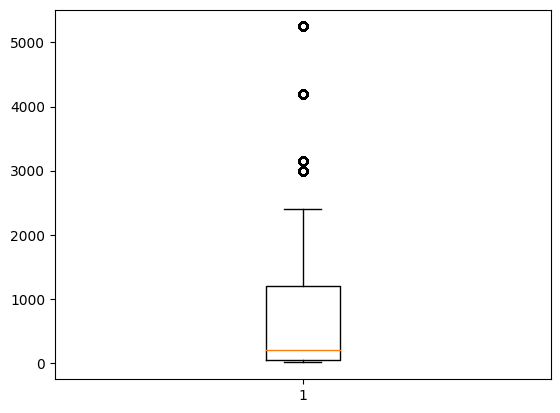

In [33]:
ret= plt.boxplot(shopping_data['price'])

## Example

In [34]:
ret

{'whiskers': [<matplotlib.lines.Line2D at 0x79de25cf8160>,
 'caps': [<matplotlib.lines.Line2D at 0x79de25cf86a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79de25eafe80>],
 'medians': [<matplotlib.lines.Line2D at 0x79de25cf8be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79de25cf8e80>],
 'means': []}

In [35]:
ret['fliers'][0].get_ydata().shape

(5024,)

In [36]:
ret['whiskers'][0].get_ydata()

array([45.45,  5.23])

In [37]:
ret['whiskers'][1].get_ydata()

array([1200.32, 2400.68])

In [38]:
ret['whiskers'][1].get_ydata()[1]

2400.68

## Fix

# ค่าตัวแปรบางตัวที่ไม่ถูกต้อง (Erroneous Data)

แก้ค่า age ของ invoice_no =[ I280590	, I210628 ] เป็น less than 18

In [39]:
shopping_data.sort_values(by='age')

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
69089,I907811,C167489,Male,18,Shoes,3,1800.51,Debit Card,12/9/2022,Kanyon
95060,I128262,C687788,Male,18,Toys,4,143.36,Cash,2/5/2021,Mall of Istanbul
78728,I280590,C142284,Female,18,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul
55784,I210628,C525437,Female,18,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
2443,I115916,C338582,Male,18,Shoes,5,3000.85,Debit Card,23/08/2022,Istinye Park
...,...,...,...,...,...,...,...,...,...,...
66267,I433176,C202678,Male,69,Toys,5,179.20,Credit Card,27/03/2021,Istinye Park
66279,I213234,C176169,Female,69,Shoes,2,1200.34,Credit Card,7/10/2021,Viaport Outlet
85428,I117055,C208685,Female,69,Souvenir,2,23.46,Cash,15/09/2022,Metrocity
66133,I288825,C345511,Female,69,Clothing,1,300.08,Credit Card,23/07/2021,Mall of Istanbul


In [78]:
shopping_data.loc[55784,'age']='less than 18'
shopping_data.loc[78728,'age']='less than 18'

In [79]:
shopping_data[(shopping_data['invoice_no']== 'I280590')|(shopping_data['invoice_no']== 'I210628')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
55784,I210628,C525437,Female,less than 18,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
78728,I280590,C142284,Female,less than 18,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul


In [62]:
shopping_data.describe()

,quantity,price
count,99457.000000,99457.000000
mean,3.003429,689.256321
std,1.413025,941.184567
min,1.000000,5.230000
25%,2.000000,45.450000
50%,3.000000,203.300000
75%,4.000000,1200.320000
max,5.000000,5250.000000


###หาค่าErrorว่าอยู่ที่ไหน

In [63]:
shopping_data[shopping_data.eq('less than 18').any(1)]

<ipython-input-63-4744250e9fad>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  shopping_data[shopping_data.eq('less than 18').any(1)]


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
55784,I210628,C525437,Female,less than 18,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
78728,I280590,C142284,Female,less than 18,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul


## Fix

###แทนค่าด้วยค่าที่เหมาะสม

In [80]:
shopping_data['age']= shopping_data['age'].replace('less than 18',17)

In [81]:
shopping_data[(shopping_data['invoice_no']== 'I280590')|(shopping_data['invoice_no']== 'I210628')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
55784,I210628,C525437,Female,17,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
78728,I280590,C142284,Female,17,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul


## Example

# ข้อมูลมีค่าตัวแปรไม่สอดคล้องซึ่งกันและกัน (Inconsistent)

## Example
เกิดเมื่อรวมข้อมูลจากหลายแหล่งแล้ว ค่าใน 2 column ไม่เป็นในทางเดียวกันเช่น column อายุ ไม่ตรงกับ column วันเกิดหลังจากคำนวณอายุแล้ว

## Fix
เลือกเก็บเฉพาะ column ที่ถูก

# Data Integration(การรวมข้อมูลจากหลายแหล่ง)

## 1. รวมแกน Y เพิ่ม column

In [89]:

sep_df = pd.read_excel('/content/drive/MyDrive/DataViz23Data/september.xlsx',header=8,skipfooter=26,)
sep_df = sep_df.iloc[-2:,:15]
sep_df['เดือน']= len(sep_df)*('sep-65')
sep_df


,รายการ,งบประมาณ,สำรองเงินมีหนี้,PO,เบิกจ่าย,ร้อยละ\nเบิกจ่าย,เป้า\nหมาย Q4,*/- เป้าหมาย,การใช้จ่าย (PO+เบิกจ่าย),ร้อยละ\nการใช้จ่าย,เป้า\nหมาย Q4.1,*/- เป้าหมาย.1,คงเหลือ\nหลังหักใช้จ่าย,ลำดับเบิกจ่าย,ลำดับ\nใช้จ่าย,เดือน
2,ประจำ,1.892013e+10,7.925745e+07,7.131600e+07,1.880196e+10,99.375405,98.0,1.375405,1.895253e+10,100.171242,100.0,0.171242,-3.239918e+07,NaN,NaN,sep-65sep-65
3,ลงทุน,9.605258e+09,2.683430e+08,1.119320e+09,8.201965e+09,85.390363,75.0,10.390363,9.589628e+09,99.837275,100.0,-0.162725,1.563013e+07,6.0,15.0,sep-65sep-65


In [90]:
oct_df= pd.read_excel('/content/drive/MyDrive/DataViz23Data/octorber.xlsx',header=9,skipfooter=27,)
oct_df = oct_df.iloc[-2:,:15]
oct_df['เดือน']= len(oct_df)*('oct-65')
oct_df

,รายการ,งบประมาณ,สำรองเงินมีหนี้,PO,เบิกจ่าย,ร้อยละ\nเบิกจ่าย,เป้า\nหมาย Q1,*/- เป้าหมาย,การใช้จ่าย (PO+เบิกจ่าย),ร้อยละ\nการใช้จ่าย,เป้า\nหมาย Q1.1,*/- เป้าหมาย.1,คงเหลือ\nหลังหักใช้จ่าย,ลำดับเบิกจ่าย,ลำดับ\nใช้จ่าย,เดือน
2,ประจำ,6822.811789,NaN,12.706842,3984.779058,58.403766,35.0,23.403766,3997.485900,58.590007,35.33,23.260007,2825.325889,NaN,NaN,oct-65oct-65
3,ลงทุน,6180.211723,NaN,457.295806,1291.209026,20.892634,19.0,1.892634,1748.504832,28.291989,28.96,-0.668011,4431.706890,4.0,6.0,oct-65oct-65


In [91]:
sep_oct_df=pd.concat([sep_df,oct_df])
sep_oct_df

,รายการ,งบประมาณ,สำรองเงินมีหนี้,PO,เบิกจ่าย,ร้อยละ\nเบิกจ่าย,เป้า\nหมาย Q4,*/- เป้าหมาย,การใช้จ่าย (PO+เบิกจ่าย),ร้อยละ\nการใช้จ่าย,เป้า\nหมาย Q4.1,*/- เป้าหมาย.1,คงเหลือ\nหลังหักใช้จ่าย,ลำดับเบิกจ่าย,ลำดับ\nใช้จ่าย,เดือน,เป้า\nหมาย Q1,เป้า\nหมาย Q1.1
2,ประจำ,1.892013e+10,7.925745e+07,7.131600e+07,1.880196e+10,99.375405,98.0,1.375405,1.895253e+10,100.171242,100.0,0.171242,-3.239918e+07,NaN,NaN,sep-65sep-65,NaN,NaN
3,ลงทุน,9.605258e+09,2.683430e+08,1.119320e+09,8.201965e+09,85.390363,75.0,10.390363,9.589628e+09,99.837275,100.0,-0.162725,1.563013e+07,6.0,15.0,sep-65sep-65,NaN,NaN
2,ประจำ,6.822812e+03,NaN,1.270684e+01,3.984779e+03,58.403766,NaN,23.403766,3.997486e+03,58.590007,NaN,23.260007,2.825326e+03,NaN,NaN,oct-65oct-65,35.0,35.33
3,ลงทุน,6.180212e+03,NaN,4.572958e+02,1.291209e+03,20.892634,NaN,1.892634,1.748505e+03,28.291989,NaN,-0.668011,4.431707e+03,4.0,6.0,oct-65oct-65,19.0,28.96


##  2. รวมแกน X (เพิ่ม rows - เพิ่ม data)

In [102]:
project_df = pd.read_csv('/content/drive/MyDrive/DataViz23Data/opendata_project-2.csv')
project_df.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11


In [103]:
unit_df = pd.read_csv('/content/drive/MyDrive/DataViz23Data/opendata_unittype-2.csv')
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,1.0,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11


In [104]:
project_df = project_df.drop_duplicates(subset='project_id', keep='last')

In [105]:
unit_df['province_en'] = unit_df['project_id'].map(project_df.set_index('project_id')['province_name_en'])

In [106]:
unit_df

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,province_en
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,Bangkok
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,Nakhon Ratchasima
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,Rayong
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,Nakhon Si Thammarat
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,Bangkok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43369,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,880000.0,...,NaN,NaN,NaN,NaN,2022-10-19 11:30:05,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11,Nakhon Ratchasima
43370,23721,unittype_15644,project_6109,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,45.0,140.0,2400000.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:24:19,2020-10-14 23:03:19,baania,https://baania.com/th/project/บ้านเต็มสิริ-1-6...,2023-06-11,Bangkok
43371,31551,unittype_21385,project_8392,อาคารพาณิชย์สี่ชั้น type B,4,Commercial,อาคารพาณิชย์,34.0,192.0,13000000.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:19:31,2020-10-14 00:38:09,baania,https://baania.com/th/project/พระเงิน-เพลส-839...,2023-06-11,Nonthaburi
43372,29837,unittype_26243,project_10566,ทาวน์โฮมสามชั้น,3,Townhome,ทาวน์โฮม,NaN,191.0,2600000.0,...,1.0,NaN,NaN,NaN,2020-12-04 10:47:10,2020-10-16 16:33:56,baania,https://baania.com/th/project/บ้านไทยวิลล่า-ศร...,2023-06-11,Chon Buri


# Data Reduction (การลดจำนวนของข้อมูล)

## Reduce Number of Data (Y-axis)- Sampling

In [108]:
shopping_data.sample(n=10, random_state=6)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
81034,I209459,C312307,Female,18,Souvenir,1,11.73,Cash,13/05/2021,Cevahir AVM
91838,I351059,C292856,Male,41,Clothing,2,600.16,Credit Card,9/7/2021,Metropol AVM
20458,I323617,C325754,Female,24,Clothing,2,600.16,Credit Card,1/2/2022,Istinye Park
73343,I104653,C209092,Male,62,Toys,5,179.20,Cash,19/11/2022,Cevahir AVM
70406,I804767,C196027,Female,65,Clothing,3,900.24,Credit Card,28/03/2022,Istinye Park
65247,I137393,C726791,Female,37,Food & Beverage,3,15.69,Credit Card,19/10/2022,Kanyon
49419,I650563,C283975,Male,28,Clothing,3,900.24,Debit Card,11/6/2021,Mall of Istanbul
90371,I109001,C901685,Female,36,Toys,3,107.52,Credit Card,15/09/2022,Istinye Park
98492,I394097,C307872,Male,29,Food & Beverage,1,5.23,Credit Card,10/11/2022,Cevahir AVM
11309,I163506,C223150,Male,34,Food & Beverage,1,5.23,Cash,17/10/2021,Kanyon


In [110]:
sam_no_replace = shopping_data.sample(frac=0.2, random_state=6)
sam_no_replace.duplicated().any()

False

In [111]:
sam_with_replace = shopping_data.sample(frac=0.2, replace=True,random_state=6)
sam_with_replace.duplicated().any()

True

In [112]:
sam_with_replace_120 = shopping_data.sample(frac=1.2, replace=True,random_state=6)

In [113]:
sam_with_replace_120.shape

(119348, 10)

## Reduce Dimention of Data (X-axis)- PCA & Stats

ดูใน PCA.ipynb